In [62]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import contractions
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from textblob import TextBlob
from xgboost import XGBClassifier
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('YoutubeCommentsDataSet.csv')

In [3]:
df.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [4]:
df.Sentiment.value_counts()

Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64

In [5]:
df.describe()

,Comment,Sentiment
count,18364,18408
unique,17871,3
top,one of the best thing about dude is that he ne...,positive
freq,10,11432


In [6]:
df.isna().sum()

Comment      44
Sentiment     0
dtype: int64

In [7]:
df2 = df.loc[~df.Comment.isna()]

In [8]:
df2.isna().sum()

Comment      0
Sentiment    0
dtype: int64

In [9]:
lemmatizer = WordNetLemmatizer()

In [10]:
df2.Comment[0]

'lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased'

In [11]:
def text_cleaning(text):
    doc = nlp(text)
    cleaned_text = ' '.join([token.lemma_ for token in doc])
    cleaned_text = re.sub(r'([^\s\w]|_)+', ' ', cleaned_text)

    return re.sub(r'\s+', ' ', cleaned_text).strip()   

In [12]:
#df2 = df2.iloc[:200]

In [13]:
df2.head()

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive


In [14]:
df2['cleaned_comment'] = df2['Comment']\
    .apply(text_cleaning)

/tmp/ipykernel_5478/3307749969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_comment'] = df2['Comment']\


In [15]:
df2

,Comment,Sentiment,cleaned_comment
0,lets not forget that apple pay in 2014 require...,neutral,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...,negative,here in nz 50 of retailer do not even have con...
2,i will forever acknowledge this channel with t...,positive,I will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,negative,whenever I go to a place that do not take appl...
4,apple pay is so convenient secure and easy to ...,positive,apple pay be so convenient secure and easy to ...
...,...,...,...
18403,i really like the point about engineering tool...,positive,I really like the point about engineer toolbox...
18404,i’ve just started exploring this field and thi...,positive,I ve just start explore this field and this be...
18405,excelente video con una pregunta filosófica pr...,neutral,excelente video con una pregunta filosófica pr...
18406,hey daniel just discovered your channel a coup...,positive,hey daniel just discover your channel a couple...


In [16]:
df2 = df2.loc[~(df2.Sentiment == 'neutral')]

In [17]:
X, y = df2['cleaned_comment'], df2['Sentiment']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [19]:
y_train.value_counts()

Sentiment
positive    9115
negative    1876
Name: count, dtype: int64

In [20]:
y_test.value_counts()

Sentiment
positive    2287
negative     461
Name: count, dtype: int64

In [21]:
tfidf_model = TfidfVectorizer(max_features=500)

In [22]:
X_train

16849    this be my favorite movie of all times siva an...
7842     ok this be so dumb and funny at the same time lol
6046     I be literally go to comment on every video yo...
12511            I hope you guy like the new video concept
13501    I m in 8th grade try to learn more and more ab...
                               ...                        
7069     thank you thank you thank you and god bless yo...
18014    thank you so much for the visualization I thin...
7322     nigerians never dissapoint I m proud to be a n...
1247     first time get into watch the asmr game kinda ...
9692                                     шикарно и красиво
Name: cleaned_comment, Length: 10991, dtype: object

In [23]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(X_train).todense())

In [24]:
tfidf_df.columns = sorted(tfidf_model.vocabulary_)

In [25]:
tfidf_df.head()

,10,able,about,absolutely,actually,add,advice,after,again,ago,...,wrong,xbox,year,yes,yet,you,young,your,yourself,youtube
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0
2,0.0,0.096511,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.168039,0.0,0.00000,0.0,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.203198,0.0,0.00000,0.0,0.0
4,0.0,0.000000,0.109835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.139383,0.0,0.09696,0.0,0.0


In [26]:
logreg = LogisticRegression()

In [27]:
logreg.fit(tfidf_df,y_train)

LogisticRegression()

In [28]:
tfidf_df_predict = pd.DataFrame(tfidf_model.transform(X_test).todense())

In [29]:
tfidf_df_predict.columns = sorted(tfidf_model.vocabulary_)

In [30]:
predicted_labels = logreg.predict(tfidf_df_predict)

In [31]:
predicted_labels

array(['positive', 'positive', 'negative', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [32]:
pred_vs_real = pd.DataFrame({'predicted' : predicted_labels, 'actual' : y_test})

In [33]:
pred_vs_real

,predicted,actual
8205,positive,positive
11293,positive,positive
12284,negative,negative
17858,positive,positive
11456,positive,positive
...,...,...
9194,positive,positive
9374,positive,negative
5586,positive,negative
16483,positive,positive


In [34]:
accuracy_score(pred_vs_real['actual'], pred_vs_real['predicted'])

0.8679039301310044

In [35]:
f1_score(pred_vs_real['actual'], pred_vs_real['predicted'], pos_label='positive')

0.924516531503431

In [36]:
logreg.predict_proba(tfidf_df_predict)[:, 1]

array([0.99669649, 0.98510021, 0.12958588, ..., 0.68418061, 0.72947425,
       0.97463057])

In [37]:
roc_auc_score(pred_vs_real['actual'], logreg.predict_proba(tfidf_df_predict)[:, 1])

0.8952923579185189

In [38]:
y_blob = []

for text in X_test:
    sentiment= TextBlob(text)
    if sentiment.sentiment.polarity > 0:
        y_blob.append('positive')
    else:
        y_blob.append('negative')

In [39]:
accuracy_score(pred_vs_real['actual'], y_blob)

0.7707423580786026

In [40]:
f1_score(pred_vs_real['actual'], y_blob, pos_label='positive')

0.8550391164289002

In [41]:
y_blob_prob = []

for text in X_test:
    sentiment= TextBlob(text)
    y_blob_prob.append((sentiment.sentiment.polarity + 1)/2)

In [42]:
roc_auc_score(pred_vs_real['actual'], y_blob_prob)

0.7979521145169292

In [43]:
xgb = XGBClassifier()

In [44]:
y_train_num = y_train.map({'positive' : 1, 'negative' : 0})

In [45]:
xgb.fit(tfidf_df,y_train_num)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
pred_xgb_num = xgb.predict(tfidf_df_predict)

In [47]:
pred_xgb = np.where(pred_xgb_num == 1, 'positive', 'negative')

In [48]:
pred_vs_real['pred_xgb'] = pred_xgb

In [49]:
pred_vs_real

,predicted,actual,pred_xgb
8205,positive,positive,positive
11293,positive,positive,positive
12284,negative,negative,negative
17858,positive,positive,positive
11456,positive,positive,positive
...,...,...,...
9194,positive,positive,positive
9374,positive,negative,positive
5586,positive,negative,negative
16483,positive,positive,positive


In [50]:
accuracy_score(pred_vs_real['actual'], pred_vs_real['pred_xgb'])

0.8726346433770015

In [51]:
f1_score(pred_vs_real['actual'], pred_vs_real['pred_xgb'], pos_label='positive')

0.9264396805380412

In [52]:
roc_auc_score(pred_vs_real['actual'], xgb.predict_proba(tfidf_df_predict)[:, 1])

0.8941868924326597

In [53]:
coefficients = logreg.coef_[0]

In [54]:
coef_df = pd.DataFrame({'Feature': sorted(tfidf_model.vocabulary_), 'Coefficient': coefficients})

In [68]:
coef_df.sort_values('Coefficient')

,Feature,Coefficient
291,not,-3.969658
37,bad,-3.293470
250,lose,-3.278571
490,wrong,-2.911016
475,why,-2.809547
...,...,...
168,great,5.081069
17,amazing,5.179355
166,good,5.214803
419,thank,5.631776


In [71]:
word_coeff = dict(zip(coef_df['Feature'], abs(coef_df['Coefficient'])))

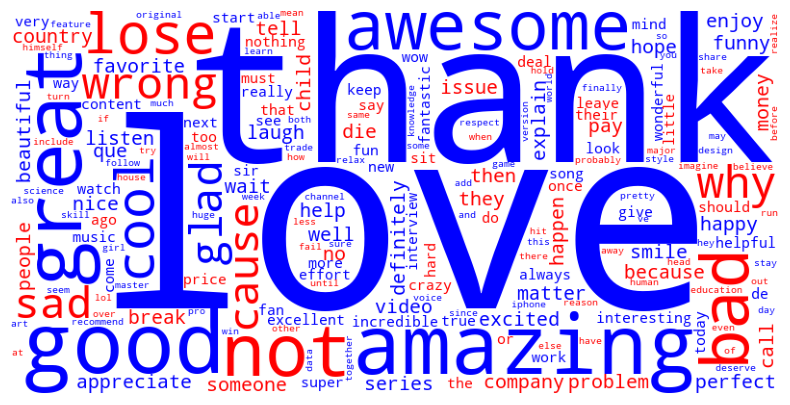

In [80]:
#wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm',
#                      relative_scaling=0.5).generate_from_frequencies(word_coeff)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(word_coeff)

# Define a function to color words based on their sign
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if coef_df.loc[coef_df['Feature'] == word, 'Coefficient'].values[0] > 0:
        return 'blue'  # Positive words in green
    else:
        return 'red'  # Negative words in red

# Apply the custom coloring
wordcloud.recolor(color_func=color_func)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)#, interpolation='bilinear')
plt.axis('off')
plt.show()

In [82]:
X_raw, y_raw = df2['Comment'], df2['Sentiment']

In [83]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42)

In [84]:
tfidf_model_raw = TfidfVectorizer(max_features=500)

In [85]:
tfidf_df_raw = pd.DataFrame(tfidf_model_raw.fit_transform(X_train_raw).todense())

In [86]:
tfidf_df_raw.columns = sorted(tfidf_model_raw.vocabulary_)

In [87]:
logreg_raw = LogisticRegression()

In [88]:
logreg_raw.fit(tfidf_df_raw,y_train_raw)

LogisticRegression()

In [89]:
tfidf_df_predict_raw = pd.DataFrame(tfidf_model_raw.transform(X_test_raw).todense())

In [90]:
tfidf_df_predict_raw.columns = sorted(tfidf_model_raw.vocabulary_)

In [91]:
predicted_labels_raw = logreg_raw.predict(tfidf_df_predict_raw)

In [92]:
pred_vs_real_raw = pd.DataFrame({'predicted' : predicted_labels_raw, 'actual' : y_test_raw})

In [93]:
accuracy_score(pred_vs_real_raw['actual'], pred_vs_real_raw['predicted'])

0.8609898107714702

In [94]:
roc_auc_score(pred_vs_real_raw['actual'], logreg_raw.predict_proba(tfidf_df_predict_raw)[:, 1])

0.8870575648269432